<a href="https://colab.research.google.com/github/quintola/Analise_dados_pos_graducao/blob/main/At3_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ATIVIDADE PRATICA 3

###REGRESSÃO LINEAR

PROFESSOR: HUGO DE PAULA

ALUNOS: DIEGO SOUZA E MARCOS JUNQUEIRA

___
RESUMO DOS DADOS:

1. **Isolamento:** Nível de isolamento térmico da casa em uma taxa de 1 a 10, sendo que 10 indica a máxima espessura do isolamento.
2. **Temperatura:** Temperatura ambiente externa média em cada casa no último ano. As medidas estão em graus Fahrenheit.
3. **Num_ocupantes:** Número total de pessoas vivendo na casa.
4. **Idade_media:** Idade média dos ocupantes da casa.
5. **Tamanho_casa:** Tamanho da casa em uma taxa variando de 1 a 8. Quanto maior o valor, maior a casa.
6. **Aquecimento_oleo:** Número total de unidades de aquecedores à óleo compradas pelo proprietário da casa no último ano. Esse é o valor a ser estimado.

___


###### CARREGAMENTO PACOTES NECESSÁRIOS PARA ATIVIDADE

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=2)

###### CARREGAMENTO BASE QUE SERÁ TRABALHADA

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving bases_regressao.xlsx to bases_regressao.xlsx


###### EXPLORAÇÃO DA BASE CARREGADA

In [ ]:
Base = pd.read_excel('bases_regressao.xlsx', sheet_name=0)
Previsao = pd.read_excel('bases_regressao.xlsx', sheet_name=1)
print("\nDimensões:\n{0}\n".format(Base.shape))
print("\nCampos:\n{0}\n".format(list(Base.keys())))
print("\nTipos dos dados:\n")
format(Base.info())
print(Base.describe().to_string(max_cols=Base.shape[1]), sep='\n')
print("\n")
print("\nDimensões:\n{0}\n".format(Previsao.shape))
print("\nCampos:\n{0}\n".format(list(Previsao.keys())))
print("\nTipos dos dados:\n")
format(Previsao.info())
print(Previsao.describe(), sep='\n')

Base['Idade_media'] = np.log10(Base['Idade_media'])
Previsao['Idade_media'] = np.log10(Previsao['Idade_media'])





Dimensões:
(1218, 6)


Campos:
['Isolamento', 'Temperatura', 'Num_ocupantes', 'Idade_media', 'Tamanho_casa', 'Aquecimento_oleo']


Tipos dos dados:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Isolamento        1218 non-null   int64  
 1   Temperatura       1218 non-null   int64  
 2   Num_ocupantes     1218 non-null   int64  
 3   Idade_media       1218 non-null   float64
 4   Tamanho_casa      1218 non-null   int64  
 5   Aquecimento_oleo  1218 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 57.2 KB
        Isolamento  Temperatura  Num_ocupantes  Idade_media  Tamanho_casa  Aquecimento_oleo
count  1218.000000  1218.000000    1218.000000  1218.000000   1218.000000       1218.000000
mean      6.214286    65.078818       3.113300    42.706404      4.649425        197.394089
std       2.768094    16.932425       1.6

###### VETORIZAÇÃO DA BASE

In [ ]:
X = MinMaxScaler().fit_transform(Base)
X = Base.iloc[:,0:(Base.shape[1] - 1)]
le = LabelEncoder()
y = le.fit_transform(Base.iloc[:,(Base.shape[1] - 1)])
class_names = le.classes_
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (original)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))

print("Descrição do modelo: ")
s = ["{0:0.2f}".format(v) for v in lr.coef_]
print("w: {}  b: {:.2f}".format(s, lr.intercept_))



Regressão Linear (original)
Coeficiente R^2 na base de treinamento: 0.79
Coeficiente R^2 na base de teste: 0.84
Número de atributos usados: 5
Descrição do modelo: 
w: ['3.41', '-0.92', '-0.58', '142.10', '3.18']  b: -121.93


###### REGRESSÃO LINEAR

###### Atributos Redundantes

In [ ]:
# Aumento das dimensões dos dados.
X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

print("Polynomial Features (atributos redundantes):")
print(X.shape)

Polynomial Features (atributos redundantes):
(1218, 20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print("Regressão Linear (Redundante)")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(lr.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(lr.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lr.coef_ != 0)))

Regressão Linear (Redundante)
Coeficiente R^2 na base de treinamento: 0.84
Coeficiente R^2 na base de teste: 0.92
Número de atributos usados: 20


###### REGRESSÃO LINEAR COM REGULARIZAÇÃO - L2 -> RIDGE


In [ ]:
ridge = Ridge().fit(X_train, y_train)
print("Ridge alpha=1")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(ridge.coef_ > 0.001)))
s = ["{0:0.2f}".format(v) for v in ridge.coef_]
print("w: {}  b: {:.2f}".format(s, ridge.intercept_))

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Ridge alpha=10")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge10.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(ridge10.coef_ > 0.001)))
s = ["{0:0.2f}".format(v) for v in ridge.coef_]
print("w: {}  b: {:.2f}".format(s, ridge.intercept_))


ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Ridge alpha=0.1")
print("Coeficiente R^2 na base de treinamento: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Coeficiente R^2 na base de teste: {:.2f}".format(ridge01.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(ridge01.coef_ > 0.001)))
s = ["{0:0.2f}".format(v) for v in ridge.coef_]
print("w: {}  b: {:.2f}".format(s, ridge.intercept_))


Ridge alpha=1
Coeficiente R^2 na base de treinamento: 0.82
Coeficiente R^2 na base de teste: 0.86
Número de atributos usados: 10
w: ['21.40', '3.74', '-2.97', '-19.08', '13.76', '-0.08', '0.00', '-0.18', '-12.01', '0.58', '-0.01', '0.00', '-1.81', '-0.07', '0.19', '1.53', '-0.16', '125.53', '-6.98', '0.20']  b: -243.79
Ridge alpha=10
Coeficiente R^2 na base de treinamento: 0.80
Coeficiente R^2 na base de teste: 0.85
Número de atributos usados: 12
w: ['21.40', '3.74', '-2.97', '-19.08', '13.76', '-0.08', '0.00', '-0.18', '-12.01', '0.58', '-0.01', '0.00', '-1.81', '-0.07', '0.19', '1.53', '-0.16', '125.53', '-6.98', '0.20']  b: -243.79
Ridge alpha=0.1
Coeficiente R^2 na base de treinamento: 0.83
Coeficiente R^2 na base de teste: 0.88
Número de atributos usados: 9
w: ['21.40', '3.74', '-2.97', '-19.08', '13.76', '-0.08', '0.00', '-0.18', '-12.01', '0.58', '-0.01', '0.00', '-1.81', '-0.07', '0.19', '1.53', '-0.16', '125.53', '-6.98', '0.20']  b: -243.79


###### COMPRAÇÃO REGRESSÃO LINEAR E RIDGE

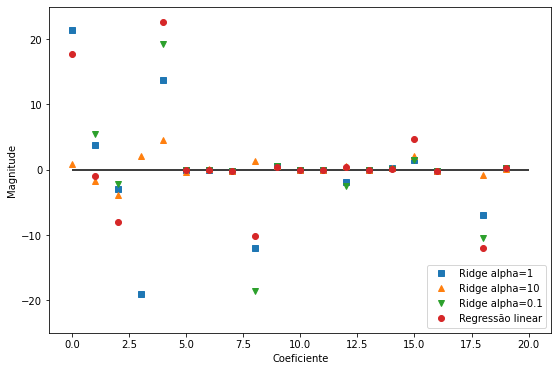

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="Regressão linear")
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()

###### REGRESSÃO LINEAR COM REGULARIZAÇÃO L1 -> LASSO

In [ ]:
lasso = Lasso().fit(X_train, y_train)
print("Lasso alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso.coef_ > 0.001)))


lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.1")
print("Acurácia na base de treinamento: {:.2f}".format(lasso01.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso01.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso01.coef_ > 0.001)))


lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso001.coef_ > 0.001)))

lasso0001 = Lasso(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("Lasso alpha=.001")
print("Acurácia na base de treinamento: {:.2f}".format(lasso0001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(lasso0001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(lasso0001.coef_ > 0.001)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 726.6488179285079, tolerance: 298.8572006386862
  positive)


Lasso alpha=1
Acurácia na base de treinamento: 0.79
Acurácia na base de teste: 0.85
Número de atributos usados: 7
Lasso alpha=.1
Acurácia na base de treinamento: 0.81
Acurácia na base de teste: 0.86
Número de atributos usados: 8
Lasso alpha=.01
Acurácia na base de treinamento: 0.84
Acurácia na base de teste: 0.91
Número de atributos usados: 11
Lasso alpha=.001
Acurácia na base de treinamento: 0.84
Acurácia na base de teste: 0.92
Número de atributos usados: 10


###### COMPRAÇÃO REGRESSÃO LINEAR E RIDGE

Text(0, 0.5, 'Magnitude')

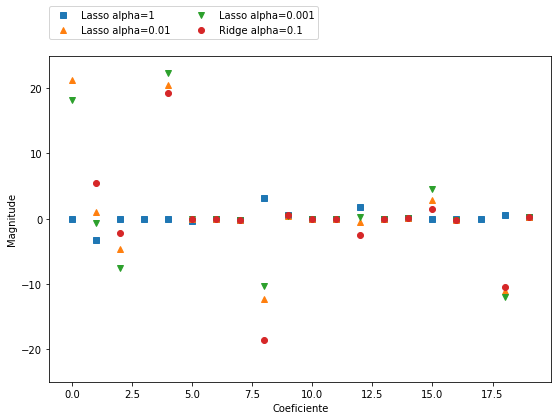

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso0001.coef_, 'v', label="Lasso alpha=0.001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")

###### UTLIZAÇÃO DO ESLATICNET -> L1 E L2

In [ ]:
enet = ElasticNet().fit(X_train, y_train)
print("ElasticNet alpha=1")
print("Acurácia na base de treinamento: {:.2f}".format(enet.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(enet.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(enet.coef_ > 0.001)))

enet001 = ElasticNet(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("ElasticNet alpha=.01")
print("Acurácia na base de treinamento: {:.2f}".format(enet001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(enet001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(enet001.coef_ > 0.001)))

enet0001 = ElasticNet(alpha=0.001, max_iter=100000).fit(X_train, y_train)
print("ElasticNet alpha=.001")
print("Acurácia na base de treinamento: {:.2f}".format(enet0001.score(X_train, y_train)))
print("Acurácia na base de teste: {:.2f}".format(enet0001.score(X_test, y_test)))
print("Número de atributos usados: {}".format(np.sum(enet0001.coef_ > 0.001)))

ElasticNet alpha=1
Acurácia na base de treinamento: 0.79
Acurácia na base de teste: 0.85
Número de atributos usados: 8
ElasticNet alpha=.01
Acurácia na base de treinamento: 0.81
Acurácia na base de teste: 0.85
Número de atributos usados: 11
ElasticNet alpha=.001
Acurácia na base de treinamento: 0.82
Acurácia na base de teste: 0.87
Número de atributos usados: 8


Text(0, 0.5, 'Magnitude')

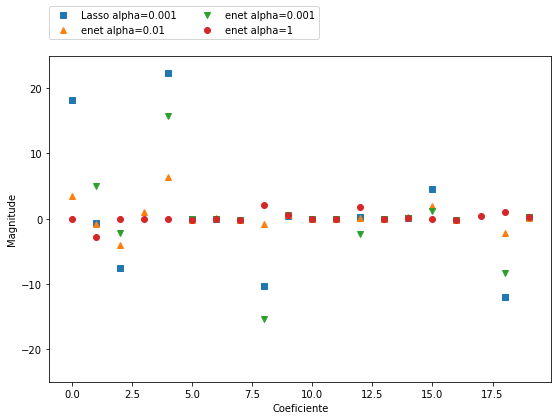

In [ ]:
plt.figure(figsize=(9, 6))
plt.plot(lasso0001.coef_, 's', label="Lasso alpha=0.001")
plt.plot(enet001.coef_, '^', label="enet alpha=0.01")
plt.plot(enet0001.coef_, 'v', label="enet alpha=0.001")
plt.plot(enet.coef_, 'o', label="enet alpha=1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coeficiente")
plt.ylabel("Magnitude")

In [ ]:
Base = Base.drop(columns=['Aquecimento_oleo'])
Base.corr()


,Isolamento,Temperatura,Num_ocupantes,Idade_media,Tamanho_casa
Isolamento,1.000000,-0.793696,-0.012567,0.620748,0.200712
Temperatura,-0.793696,1.000000,0.012519,-0.638015,-0.213939
Num_ocupantes,-0.012567,0.012519,1.000000,-0.045188,-0.022534
Idade_media,0.620748,-0.638015,-0.045188,1.000000,0.302910
Tamanho_casa,0.200712,-0.213939,-0.022534,0.302910,1.000000


### RESOLUÇÃO EXERCÍCIO

APÓS REALIZAÇÃO DO PROCEDIMENTOS, ENTENDEMOS QUE OS ATRIBUTOS MAIS IMPORTANTES SÃO OS DE ISOLAMENTO E IDADE MEDIA.

IDADE MÉDIA E ISOLAMENTO SÃO DIRETAMENTE RELACIONADOS, ENQUANTO A TEMPERATURA É INVERSAMENTE.

O NÚMERO DE OCUPANTES NÃO FOI SIGNIFICATIVO.

#### PREVISÃO DO MODELO

In [ ]:
Modelo = lr
Modelo2 = ridge01
Modelo3 = lasso0001
Modelo4 = enet0001

In [ ]:
Modelo.fit(X_train,y_train)
y_pred = Modelo.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,21,40.083696
1,17,22.695292
2,4,19.441926
3,141,144.645860
4,13,8.611001
...,...,...
117,160,136.587232
118,131,126.031025
119,128,112.273287
120,32,27.780604


In [ ]:
Modelo2.fit(X_train,y_train)
y_pred = Modelo2.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,21,39.365397
1,17,25.704928
2,4,5.236712
3,141,148.671824
4,13,9.402813
...,...,...
117,160,131.038669
118,131,128.076210
119,128,109.316588
120,32,29.747539


In [ ]:
Modelo3.fit(X_train,y_train)
y_pred = Modelo3.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,21,40.058687
1,17,22.777852
2,4,18.929420
3,141,144.796603
4,13,8.672326
...,...,...
117,160,136.379160
118,131,126.099554
119,128,112.165817
120,32,27.846004


In [ ]:
Modelo4.fit(X_train,y_train)
y_pred = Modelo4.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,21,37.722791
1,17,23.543442
2,4,4.773947
3,141,150.034520
4,13,10.488940
...,...,...
117,160,128.790481
118,131,128.686798
119,128,108.509978
120,32,29.850098
